<a href="https://colab.research.google.com/github/Maisho20/PCVK_Sabbaha-Naufal-Erwanda/blob/main/Pertemuan%203/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Nama: Sabbaha Naufal Erwanda
#####kelas: TI-3A
#####NIM : 2141720221

# Praktikum

In [1]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Transformasi Linier Brightness

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


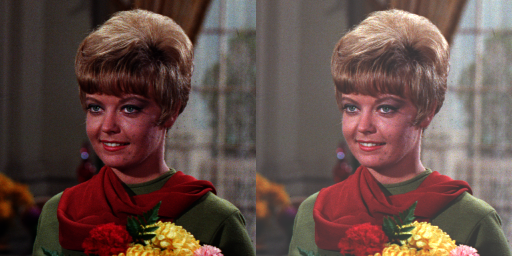

In [4]:
original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[x,y,c] = np.clip(original[x,y,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

## 1. Inverse citra

Mengubah nilai Inverse citra
--------------------------------
Masukkan nilai Inverse: 50


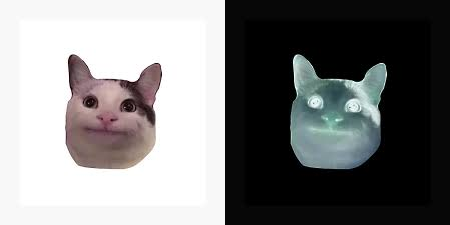

In [5]:
# Membaca citra dari file
print('Mengubah nilai Inverse citra')
print('--------------------------------')
try:
  inverse = int(input('Masukkan nilai Inverse: '))
except ValueError:
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/BLYAD.jpg')
inverse_image = np.zeros(img.shape, img.dtype)

#akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      inverse_image[x,y,c] = 255 - np.clip(img[x,y,c], 0, 255)

final_frame = cv.hconcat((img, inverse_image))
cv2_imshow(final_frame)

#cara langsung
# Melakukan inverse citra
#inv = cv.bitwise_not(img)

# Menampilkan citra asli dan hasilnya
#cv2_imshow(img)
#cv2_imshow(inv)

## 2. Kontras dan Brightness

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


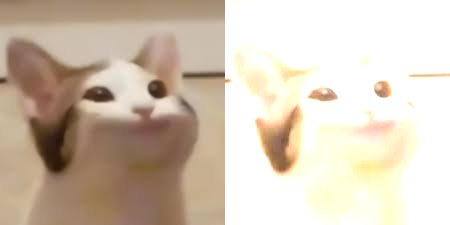

In [6]:
# Membaca citra dari file
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contras = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

png = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/popcat.jpg')
brightness_image1 = np.zeros(png.shape, png.dtype)

#akses per piksel
for y in range(png.shape[0]):
  for x in range(png.shape[1]):
    for z in range(png.shape[2]):
      brightness_image1[x,y,z] = np.clip(contras * png[x,y,z]+ brightness,0,255)

final_frame = cv.hconcat((png, brightness_image1))
cv2_imshow(final_frame)

## 3. Logarithmic Brightness

Mengubah tingkat kecerahan citra dengan logarithmic brightness
--------------------------------
Masukkan nilai kecerahan: 50


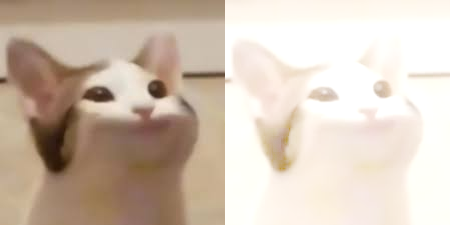

In [7]:
# Membaca citra dari file
print('Mengubah tingkat kecerahan citra dengan logarithmic brightness')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

jpg = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/popcat.jpg')

#akses per piksel
brightness_image2 = np.log1p(jpg.astype(np.float32)) * brightness
brightness_image2 = np.clip(brightness_image2, 0, 255).astype(np.uint8)


final_frame = cv.hconcat((jpg, brightness_image2))
cv2_imshow(final_frame)

## 4. Transformasi Grayscale

### A. Averaging

Mengubah citra menjadi grayscale dengan metode averaging
--------------------------------------------------------


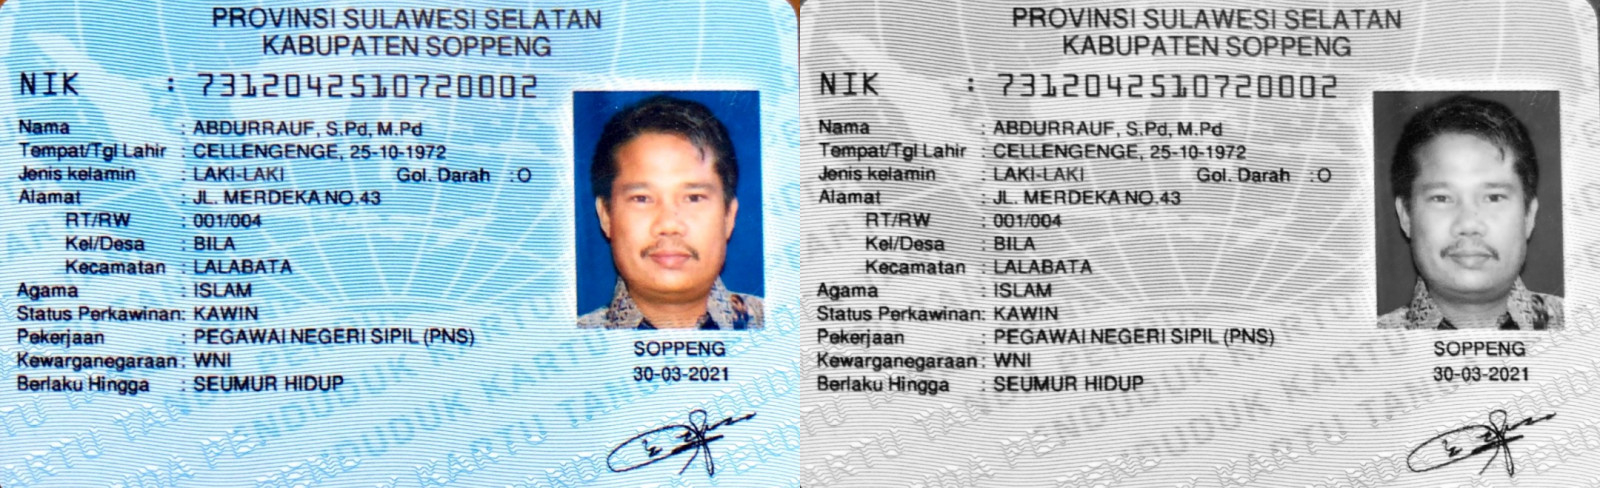

In [8]:
# Membaca citra dari file
print('Mengubah citra menjadi grayscale dengan metode averaging')
print('--------------------------------------------------------')

jpg = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP.jpeg')
gray_avg = np.zeros(jpg.shape, jpg.dtype)

# akses per pikseld
for y in range(jpg.shape[0]):
    for x in range(jpg.shape[1]):
        gray_avg[y,x] = np.mean(jpg[y,x,:])

final_frame = cv.hconcat((jpg, gray_avg))
cv2_imshow(final_frame)

### B. Lightness

Mengubah citra menjadi grayscale dengan metode Lightness
--------------------------------------------------------


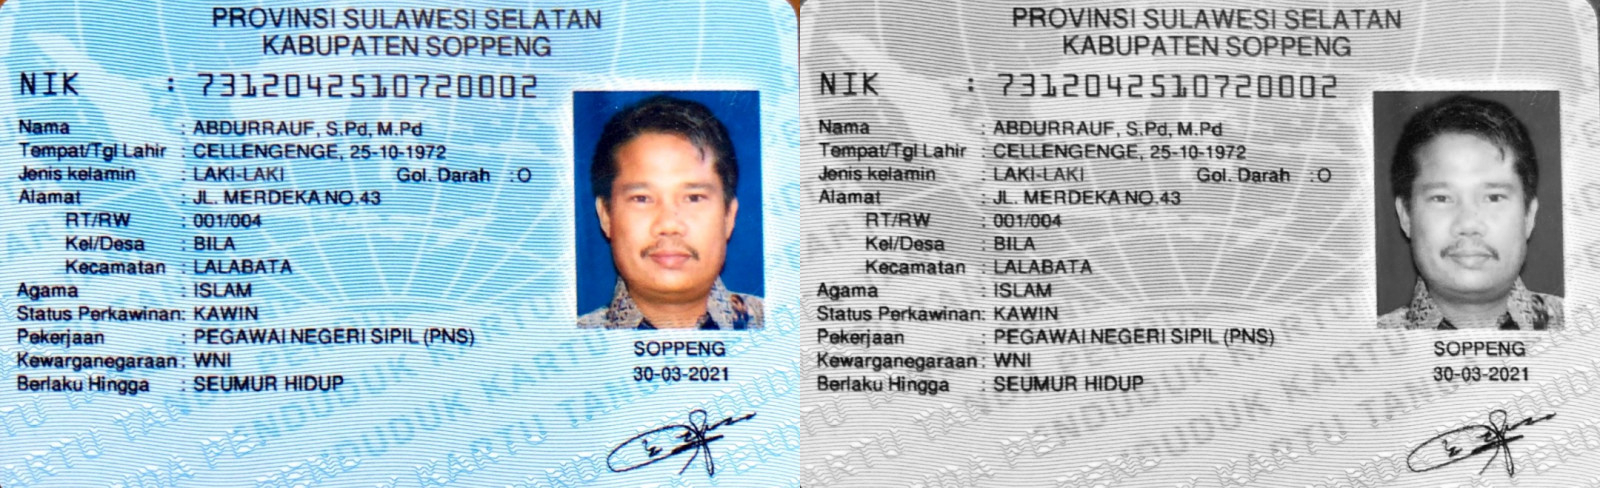

In [9]:
print('Mengubah citra menjadi grayscale dengan metode Lightness')
print('--------------------------------------------------------')

jpg = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP.jpeg')
gray_light = np.zeros(jpg.shape, jpg.dtype)

# akses per piksel
for y in range(jpg.shape[0]):
    for x in range(jpg.shape[1]):
        gray_light[y,x] = np.mean([np.max(jpg[y,x,:]), np.min(jpg[y,x,:])])

final_frame = cv.hconcat((jpg, gray_light))
cv2_imshow(final_frame)

### C. Luminance

Mengubah citra menjadi grayscale dengan metode Luminance
--------------------------------------------------------


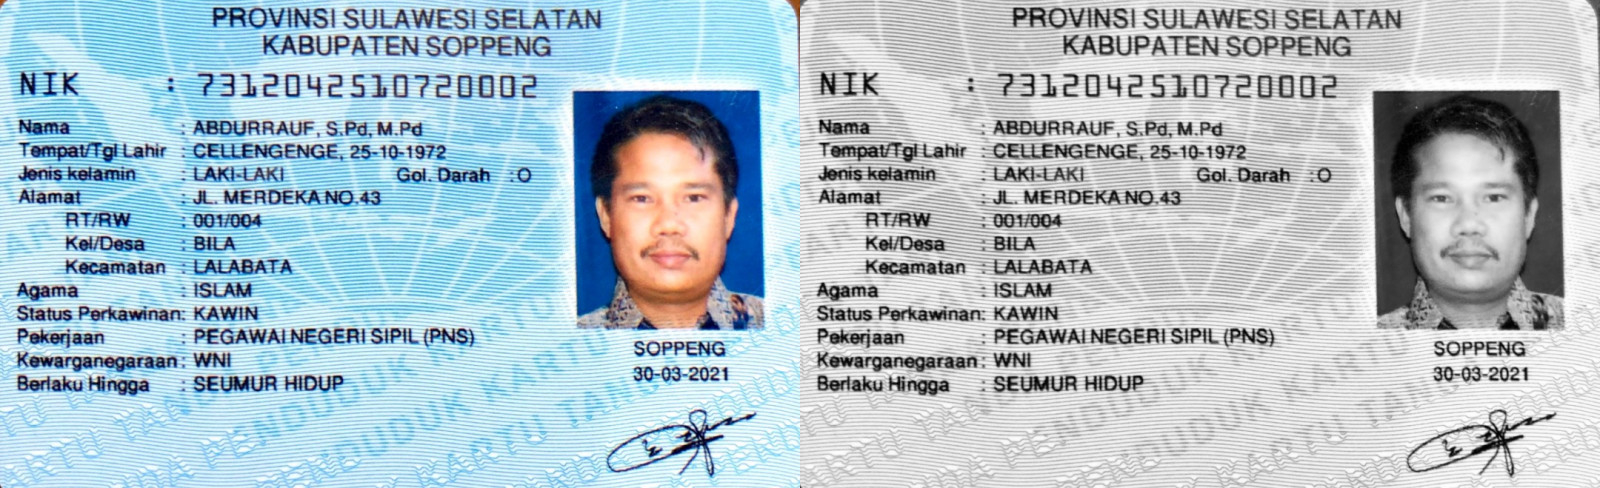

In [10]:
print('Mengubah citra menjadi grayscale dengan metode Luminance')
print('--------------------------------------------------------')

jpg = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP.jpeg')
gray_lum = np.zeros(jpg.shape, jpg.dtype)

# akses per piksel
for y in range(jpg.shape[0]):
    for x in range(jpg.shape[1]):
        # Menggunakan rumus Luminance untuk menghitung nilai piksel grayscale
        gray_lum[y,x] = 0.21 * jpg[y,x,2] + 0.72 * jpg[y,x,1] + 0.07 * jpg[y,x,0]

final_frame = cv.hconcat((jpg, gray_lum))
cv2_imshow(final_frame)

## 5. Menampilkan warna tertentu

Mengubah citra menampilkan warna tertentu
--------------------------------------------------------


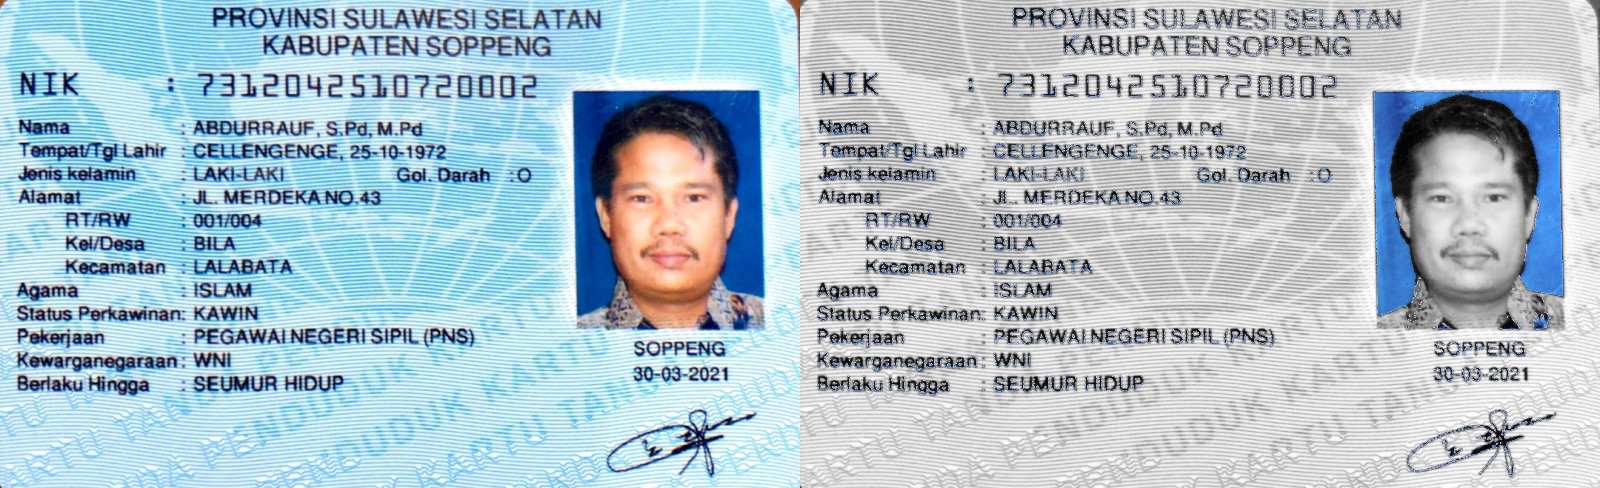

In [11]:
print('Mengubah citra menampilkan warna tertentu')
print('--------------------------------------------------------')
jpg = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP.jpeg')

# Menentukan rentang warna yang ingin ditampilkan (misalnya warna merah)
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])


# Membuat masker biner dengan fungsi cv2.inRange
mask_blue = cv.inRange(jpg, lower_blue, upper_blue)

# Menggunakan masker untuk mengambil hanya piksel yang berwarna biru
blue_only = cv.bitwise_and(jpg, jpg, mask=mask_blue)

#convert sisa image menjadi grayscale
gray_mask = cv.cvtColor(cv.bitwise_not(mask_blue), cv.COLOR_GRAY2BGR)
gray_image = cv.cvtColor(jpg, cv.COLOR_BGR2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)


# Menampilkan citra asli dan hasilnya
mask_ktp = cv.add(gray_image, blue_only)
final_frame = cv.hconcat((jpg, mask_ktp))
cv2_imshow(final_frame)